# Import the libraries

In [1]:
import numpy as np 
import pandas as pd 
# Used to grab the stock prices, with yahoo 
import pandas_datareader as web 
from datetime import datetime 
# To visualize the results 
import matplotlib.pyplot as plt 
import seaborn

# Select the list of tickers and select the daterange

In [2]:
start = datetime(2017, 1, 1)
symbols_list = ['AAPL','TWTR', 'AMZN', 'GOOGL', 'GE', 'TSLA', 'IBM', 'PYPL']
#array to store prices
symbols=[]

# Pull stock prices, push into clean dataframe

In [3]:
#array to store prices
symbols=[]
for ticker in symbols_list:     
    r = web.DataReader(ticker, 'yahoo', start)   
    # add a symbol column   
    r['Symbol'] = ticker    
    symbols.append(r)
# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()
df_pivot=df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()

Symbol,Date,AAPL,AMZN,GE,GOOGL,IBM,PYPL,TSLA,TWTR
0,2017-01-03,29.037500,37.683498,243.769226,40.400501,159.837479,40.250000,14.466000,16.440001
1,2017-01-04,29.004999,37.859001,243.846161,40.388500,161.816437,41.000000,15.132667,16.860001
2,2017-01-05,29.152500,39.022499,242.461533,40.651001,161.281067,41.060001,15.116667,17.090000
3,2017-01-06,29.477501,39.799500,243.153839,41.260502,162.074570,41.450001,15.267333,17.170000
4,2017-01-09,29.747499,39.846001,242.000000,41.359001,160.277252,41.400002,15.418667,17.500000


# Now, we can run the correlation. Using the Pandas ‘corr’ function to compute the Pearson correlation coeffecient between each pair of equities

In [4]:
corr_df = df_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)

Symbol,AAPL,AMZN,GE,GOOGL,IBM,PYPL,TSLA,TWTR
Symbol,,,,,,,,
AAPL,1.000000,0.863120,-0.407079,0.948567,-0.364680,0.625508,0.964132,0.702401
AMZN,0.863120,1.000000,-0.570178,0.849359,-0.553471,0.871070,0.807346,0.837104
GE,-0.407079,-0.570178,1.000000,-0.334351,0.743919,-0.359262,-0.267593,-0.492149
GOOGL,0.948567,0.849359,-0.334351,1.000000,-0.282554,0.671479,0.944880,0.738864
IBM,-0.364680,-0.553471,0.743919,-0.282554,1.000000,-0.430646,-0.292006,-0.403634
PYPL,0.625508,0.871070,-0.359262,0.671479,-0.430646,1.000000,0.595033,0.856979
TSLA,0.964132,0.807346,-0.267593,0.944880,-0.292006,0.595033,1.000000,0.666613
TWTR,0.702401,0.837104,-0.492149,0.738864,-0.403634,0.856979,0.666613,1.000000


# Finally, we can plot a heatmap of the correlations (with Seaborn and Matplotlib) to better visualize the results

<Figure size 432x288 with 0 Axes>

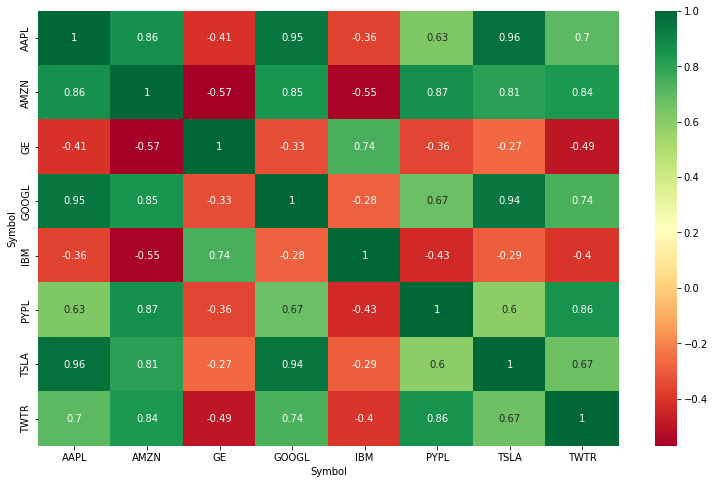

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure(figsize=(13, 8))
seaborn.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()